In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import pandas as pd
import numpy as np
import torch

import json
from pathlib import Path
from copy import deepcopy

import pyciemss.visuals.plots as plots
from pyciemss.utils import get_tspan
from pyciemss.utils.interface_utils import convert_to_output_format


In [2]:
# Load cached data...
tspan = get_tspan(1, 50, 500).detach().numpy()

root = Path("..")/"test"/"data/"
prior_samples = convert_to_output_format(plots.tensor_load(root/"prior_samples.json"), 
                                         tspan, time_unit="years")
observed_trajectory = convert_to_output_format(plots.tensor_load(root/"observed_trajectory.json"), 
                                               tspan, time_unit="years")

observed_points = (observed_trajectory
    .rename(columns={"Rabbits_sol": "Rabbits Samples"})
    .drop(columns=["Wolves_sol", "alpha_param", "beta_param", "delta_param", "gamma_param"])
    .iloc[::10]
)


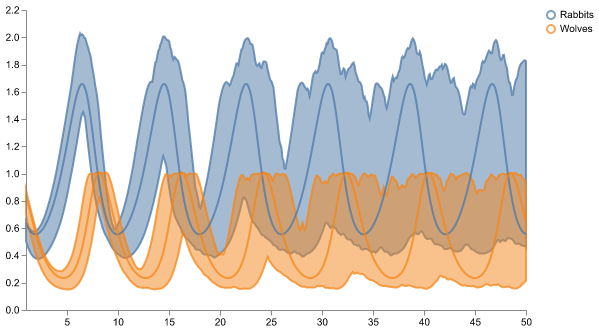

In [6]:
nice_labels={"Rabbits_sol": "Rabbits", "Wolves_sol": "Wolves"} 
trajectory_data = prior_samples 
selected_traces = plots.select_traces(trajectory_data, example_traj_agg = "mean", # mean or var 
                                      subset=".*_sol", relabel=nice_labels) 
schema = plots.trajectories(prior_samples,  relabel=nice_labels, keep = ['Rabbits_sol', 'Wolves_sol'], traces = selected_traces ) 
schema = plots.pad(schema, 5) 
plots.save_schema(schema, "_schema.json") 
plots.ipy_display(schema)

In [4]:
schema = plots.trajectories(
    prior_samples,
    keep=".*_sol",
    points=observed_points)
points = pd.DataFrame(plots.find_named(schema["data"], "points")["values"])
print(points.columns)



Index(['timepoint', 'sample_id', 'trajectory', 'value'], dtype='object')


In [5]:
plots.find_named(schema["data"], "traces")["values"]

[]

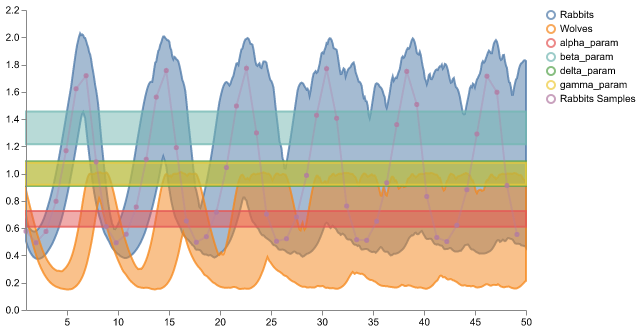

In [6]:
nice_labels={"Rabbits_sol": "Rabbits", "Wolves_sol": "Wolves"}

schema = plots.trajectories(prior_samples, 
                           relabel=nice_labels,
                           points=observed_points
                           )
schema = plots.pad(schema, 5)

plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema)

In [ ]:
exemplars = prior_samples[prior_samples["sample_id"] == 0]
wolves = exemplars.set_index("timepoint_years")["Wolves_sol"].rename("Wolves Example")
rabbits = exemplars.set_index("timepoint_years")["Rabbits_sol"].rename("Rabbits Example")
traces = pd.concat([wolves, rabbits], axis="columns")
nice_labels={"Rabbits_sol": "Rabbits", "Wolves_sol": "Wolves"}
colors = {"Rabbits": "#aec7e8", 
          "Wolves": "#fdae6b",  
          "Wolves Example": "#ff7f0e",
          "Rabbits Example": "#1f77b4",
          "trash": "black", 
          "gamma": None}

schema = plots.trajectories(prior_samples,
                           traces=traces, 
                           relabel=nice_labels,
                           colors=colors,
                           markers={"Confident": 10, "Uncertain": 25}
                           )
schema = plots.pad(schema, 5)
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema)

ERROR TypeError: Cannot read properties of null (reading 'getContext')
    at ct (https://cdn.skypack.dev/-/vega-label@v1.2.1-hEHqe293fM7lKP2OHb0o/dist=es2020,mode=imports,min/optimized/vega-label.js:1:777)
    at Ot (https://cdn.skypack.dev/-/vega-label@v1.2.1-hEHqe293fM7lKP2OHb0o/dist=es2020,mode=imports,min/optimized/vega-label.js:1:7314)
    at et.transform (https://cdn.skypack.dev/-/vega-label@v1.2.1-hEHqe293fM7lKP2OHb0o/dist=es2020,mode=imports,min/optimized/vega-label.js:1:9086)
    at et.evaluate (https://cdn.skypack.dev/-/vega-dataflow@v5.7.5-asKYS4gpPLMPf64pSozt/dist=es2020,mode=imports,min/optimized/vega-dataflow.js:1:15429)
    at et.run (https://cdn.skypack.dev/-/vega-dataflow@v5.7.5-asKYS4gpPLMPf64pSozt/dist=es2020,mode=imports,min/optimized/vega-dataflow.js:1:15286)
    at ne.Gt [as evaluate] (https://cdn.skypack.dev/-/vega-dataflow@v5.7.5-asKYS4gpPLMPf64pSozt/dist=es2020,mode=imports,min/optimized/vega-dataflow.js:1:12073)
    at ne.evaluate (https://cdn.skypack.dev/-/v